# Set up

In [ ]:
import geopandas as gpd
import networkx as nx
import numpy as np

import sys
sys.path.append("C:/Users/a/Anaconda/Lib/site-packages/")
import openpyxl
import xlsxwriter
import momepy

import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import pandana, matplotlib.pyplot as plt
%matplotlib inline
from pandana.loaders import osm

from shapely.geometry import Point

import osmnx as ox
ox.config(log_file=True, log_console=True, use_cache=True)
ox.__version__

'0.15.1'

# Parameter

In [ ]:
#####Latitude and longitude of the center point
#####Plaza Luceros: 38.3459813, -0.49069405
#####Plaza Luceros Moveing 50, 100, 200, 300, 500, 1000, 1500m torward north:(38.34643148517816, 38.34688167031629, 38.34778204047261, 38.34868241046897, 38.35048314998173, 38.35498499596392, 38.359486837946314)
#####Plaza Gabriel Miró:  38.343352, -0.484987 (38.343802183407995,38.344252366775976,38.34515273339189, 38.34605309984774, 38.34785383227921, 38.352355660556626, 38.35685748483198)
#####Plaza de San Cristobal: 38.346731, -0.483661(38.34718118268919, 38.347631365338344, 38.3485317305166, 38.34943209553474, 38.35123282509076, 38.355734646178995, 38.360236463264435)
#####"Montpellier:(43.608653, 3.875934),(43.622157595579566,3.875934),(43.63566215913399,3.875934),(43.64916669066263,3.875934),(43.66267119016487,3.875934), (43.67617565764011,3.875934),(43.68968009308775,3.875934), (43.703184496507184,3.875934)
#####Parameters
tags = '["highway"~"sidewalk|primary|secondary|tertiary|unclassified|residential|pedestrian|steps|path"]'
networkType = "walk"
center_point = ['0m', '50m', '100m', '200m', '300m', '500m', '1000m', '1500m']

distance = 1500

lat = 38.3459813
lon = -0.49069405
point = (lat, lon)

hh_u_station_name=["U A Norderstedt Mitte","U Ahrensburg Ost","U Ahrensburg West","U Alsterdorf","U Alter Teichweg",
                   "U Baumwall","U Berne (Berner Heerweg)","U Berne (Kriegkamp)","U Billstedt","U Borgweg",
                   "U Buchenkamp","U Burgstraße","U Dehnhaide","U Eppendorfer Baum","U Farmsen",
                   "U Feldstraße","U Fuhlsbüttel","U Fuhlsbüttel Nord","U Gänsemarkt","U Garstedt",
                   "U Großhansdorf","U Großhansdorf (Schaapkamp)","U HafenCity Universität","U Hagenbecks Tierpark","U Hallerstraße",
                   "U Hamburger Straße","U Hammer Kirche","U Hoheluftbrücke","U Hoisbüttel","U Horner Rennbahn",
                   "U Hudtwalckerstraße","U Kellinghusenstraße","U Kiekut","U Klosterstern","U Langenhorn Markt (Krohnstieg)",
                   "U Langenhorn Markt (Tangstedter Landstraße)","U Langenhorn Nord","U Lattenkamp","U Lohmühlenstraße","U Meiendorfer Weg",
                   "U Merkenstraße","U Mümmelmannsberg","U Mundsburg","U Niendorf Markt","U Niendorf Nord",
                   "U Ochsenzoll","U Osterstraße","U Rauhes Haus","U Ritterstraße","U Rödingsmarkt",
                   "U S Barmbek","U S Berliner Tor (Beim Strohhause)","U S Berliner Tor (Bürgerweide)","U S Jungfernstieg","U S Landungsbrücken",
                   "U S Ohlsdorf (Alsterdorfer Straße)","U S Ohlsdorf (Fuhlsbüttler Straße)","U S Ohlsdorf (Im Grünen Grunde)","U S Sternschanze","U S Wandsbeker Chaussee",
                   "U Saarlandstraße","U Schlump","U Schmalenbeck","U Sierichstraße","U St.Pauli",
                   "U Steinfurther Allee","U Steinstraße","U Stephansplatz","U Straßburger Straße","U Überseequartier",
                   "U Uhlandstraße","U Volksdorf","U Wandsbek Markt","U Wandsbek-Gartenstadt","U Wartenau"]
hh_u_station_point =[(53.706806, 9.992349),(53.66138, 10.244023),(53.664174, 10.220443),(53.607153, 10.01243),(53.586194, 10.06371),(53.544422, 9.98168),(53.626376, 10.137985),(53.62597, 10.140136),(53.542586, 10.106545),(53.590675, 10.01551),(53.653049, 10.186605),(53.555634, 10.041424),(53.580221, 10.041002),(53.58355, 9.984339),(53.607443, 10.117109),(53.557302, 9.969091),(53.632682, 10.025922),(53.640162, 10.017107),(53.555578, 9.987627),(53.684875, 9.983508),(53.661894, 10.287109),(53.662349, 10.285746),(53.540657, 10.005457),(53.593383, 9.943803),(53.572678, 9.98866),(53.575216, 10.035927),(53.55551, 10.054489),(53.578676, 9.976057),(53.678269, 10.147178),(53.554008, 10.083831),(53.594086, 9.996651),(53.588622, 9.991418),(53.653365, 10.282326),(53.582294, 9.987374),(53.649432, 10.01736),(53.648956, 10.016366),(53.661362, 10.018722),(53.600076, 9.994874),(53.557504, 10.02152),(53.63906, 10.157091),(53.538791, 10.126975),(53.527117, 10.149843),(53.569908, 10.027269),(53.619169, 9.952026),(53.640051, 9.949729),(53.678133, 10.001118),(53.576238, 9.950789),(53.554066, 10.065333),(53.567192, 10.044184),(53.548751, 9.987423),(53.586974, 10.043524),(53.553412, 10.025043),(53.553306, 10.025825),(53.552993, 9.992773),(53.546211, 9.969486),(53.619645, 10.032119),(53.621296, 10.033414),(53.62067, 10.030996),(53.56413, 9.965942),(53.569932, 10.058471),(53.586861, 10.031758),(53.567715, 9.970401),(53.653008, 10.263515),(53.590025, 10.00305),(53.55119, 9.969313),(53.541472, 10.139009),(53.548867, 10.005848),(53.558215, 9.988247),(53.582244, 10.066434),(53.541248, 9.999286),(53.56549, 10.025909),(53.650633, 10.161794),(53.571602, 10.067767),(53.592143, 10.075746),(53.564449, 10.034094)]

points_3=[(43.608653, 3.875934),(43.60910315371332,3.875934),(43.6095533073903,3.875934),(43.61045361463514,3.875934),
          (43.6113539217345,3.875934),(43.61315453549679,3.875934),(43.61765606735666,3.875934),(43.622157595579566,3.875934)]
points_new = [(48.853132, 2.335843),(37.983972, 23.727806),(41.386857, 2.152280),(40.426878, -3.703943), (45.76, 4.84),
              (44.4325, 26.103889),(45.466944, 9.19),(41.162142, -8.621953),(55.676111, 12.568333),(39.466667, -0.375),
              (52.366667, 4.9),(44.84, -0.58),(37.389027, -5.984449),(43.6119, 3.8772),(53.35, -6.266667),
              (43.7034, 7.2663),(48.2, 16.366667),(38.114699, 13.356239),(55.601879, 13.005881),(52.512638, 13.392413),
              (43.600732, 1.446693),(50.633333, 5.533333),(52.233333, 21.016667),(41.886440, 12.507154),(47.502691, 19.058032),
              (50.116667, 8.683333),
              (43.773160, 11.255477),(44.492837, 11.342884),(34.041779, -118.252664),(29.758271, -95.363544),(-15.805263, -47.889585)]
cities_new = [ "Paris", "Athens", "Barcelona","Madrid", "Lyon",
              "Bucharest", "Milan","Porto", "Copenhagen","Valencia",
              "Amsterdam", "Bordeaux","Seville", "Montpellier","Dublin",
              "Nice","Vienna", "Palermo","Malmö","Berlin",
              "Toulouse", "Saint-Nicolas, Liege, Belgium","Warsaw","Rome","Budapest",
              "Frankfurt am Main",
              "Florence","Bologna", "Los Angeles","Houston", "Brasilia"]
len(cities_new)

# "Athens"(1),"Berlin"(19),"Bordeaux"(11), "Montpellier"(13), "Bucharest"(5),"Copenhagen"(8), "Milan"(6), "Toulouse"(20)
# Brasilia(30),  "Los Angeles"(28)
# "Florence","Bologna"(27),"Frankfurt am Main"(25),

31

# Get graph

In [ ]:
G = ox.graph_from_point(points_3[7], dist=distance, network_type='none', custom_filter = tags)
len(G.nodes())

2316

# Find the "central node" and "Id of the node nearest to center point" in each section

In [ ]:
#### 1.Find the central node of different sections
##### Latitude & longitude of the four corners
distances =[50, 100, 200, 300, 500, 1000, 1500]
all_centers=[]
for i in range(0, len(hh_u_station_point)):
    all_centers.append((hh_u_station_point[i][0], hh_u_station_point[i][1]))
    for j in range(0, len(distances)):
        # bbox = ox.utils_geo.bbox_from_point(points_new[i], dist = distances[j])
        north, south, east, west = ox.utils_geo.bbox_from_point(hh_u_station_point[i], distances[j], project_utm=False) #If lat & lon are desired : project_utm=Fale
        x = (north,  hh_u_station_point[i][1])
        all_centers.append(x)
all_centers

[(53.706806, 9.992349),
 (53.70725535048047, 9.992349),
 (53.707704700925596, 9.992349),
 (53.70860340170979, 9.992349),
 (53.70950210235261, 9.992349),
 (53.71129950321406, 9.992349),
 (53.71579300289339, 9.992349),
 (53.720286499038146, 9.992349),
 (53.66138, 10.244023),
 (53.66182931535289, 10.244023),
 (53.66227863066961, 10.244023),
 (53.66317726119452, 10.244023),
 (53.66407589157473, 10.244023),
 (53.665873151901046, 10.244023),
 (53.670366300184575, 10.244023),
 (53.67485944485068, 10.244023),
 (53.664174, 10.220443),
 (53.66462331912282, 10.220443),
 (53.665072638209544, 10.220443),
 (53.665971276274746, 10.220443),
 (53.66686991419557, 10.220443),
 (53.66866718960414, 10.220443),
 (53.67316037559926, 10.220443),
 (53.67765355798542, 10.220443),
 (53.607153, 10.01243),
 (53.60760235524708, 10.01243),
 (53.608051710458724, 10.01243),
 (53.60895042077569, 10.01243),
 (53.60984913095093, 10.01243),
 (53.6116465508761, 10.01243),
 (53.61614009820844, 10.01243),
 (53.62063364199714

In [ ]:
len(all_centers)

600

In [ ]:
#####Group all_centers into 31 groups
import numpy as np

split = np.array_split(all_centers, len(hh_u_station_name))
len(split)

75

In [ ]:
#Put 2 lists (cities_new & split) into a dictionary
# https://stackoverflow.com/questions/26269267/combining-two-lists-into-a-dictionary-in-python
d = {} #Dictionary

for i in range(min(len(cities_new),len(points_new))):
    # for index number in the length of smallest list
    d[cities_new[i]] = split[i]
    # add the value of listA at that place to the dictionary with value of listB

print (d) #Not sure of your Python version, so I've put d in parentheses

{'Paris': array([[48.853132  ,  2.335843  ],
       [48.85358176,  2.335843  ],
       [48.85403152,  2.335843  ],
       [48.85493105,  2.335843  ],
       [48.85583057,  2.335843  ],
       [48.85762962,  2.335843  ],
       [48.86212723,  2.335843  ],
       [48.86662485,  2.335843  ]]), 'Athens': array([[37.983972  , 23.727806  ],
       [37.98442213, 23.727806  ],
       [37.98487227, 23.727806  ],
       [37.98577254, 23.727806  ],
       [37.9866728 , 23.727806  ],
       [37.98847334, 23.727806  ],
       [37.99297468, 23.727806  ],
       [37.99747601, 23.727806  ]]), 'Barcelona': array([[41.386857  ,  2.15228   ],
       [41.38730733,  2.15228   ],
       [41.38775766,  2.15228   ],
       [41.38865833,  2.15228   ],
       [41.38955899,  2.15228   ],
       [41.39136032,  2.15228   ],
       [41.39586364,  2.15228   ],
       [41.40036695,  2.15228   ]]), 'Madrid': array([[40.426878  , -3.703943  ],
       [40.42732842, -3.703943  ],
       [40.42777885, -3.703943  ],
      

In [ ]:
# Id of the node nearest to center point in each section
nearest_id = []
distance = 1500
point = (-15.805263, -47.889585)
G = ox.graph_from_point(point, dist=distance, network_type='none', custom_filter = tags)
for i in range (0, len(points_3)):
    nearest = ox.get_nearest_node(G, (point[0], point[1]), method='haversine', return_dist=True)
    nearest_id.append(nearest[0])
nearest_id

[1554294125,
 1554294125,
 1554294125,
 1554294125,
 1554294125,
 1554294125,
 1554294125,
 1554294125]

# Plot the network graphs and center points

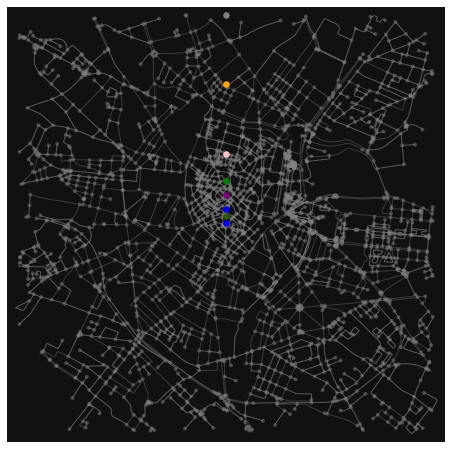

In [ ]:
#####Plot the network
colors  = ['blue', '#2b580c','blue','purple','green','pink','orange','grey']

#####Plot the center points
distance = 1500
G = ox.graph_from_point(point, dist=distance, network_type='none', custom_filter = tags)
fig, ax = ox.plot_graph(G, node_color='grey', node_alpha=0.5, edge_alpha= 0.3, show= False, close=False) #Switch off "show" first before plotting the red node
for i in range(0, len(points_3)):
    ax.scatter(points_3[i][1], points_3[i][0], s=30, c=colors[i])
plt.show()

# GDF to DF

In [ ]:
#####Gdf of nodes and edges to find the lat and lon of each node
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
len(gdf_nodes)
len(gdf_edges)

3288

In [ ]:
##### Covert from GDF to DF
df_G = pd.DataFrame.from_dict(gdf_nodes)

#####Safe dataframe to csv file
writer = pd.ExcelWriter('D:/Thesis/plaza1_Luceros/centerPoint_placementEffect/networkType_selectedHighway/center point moves to north/node_latlon/Luceros_n1500m_selectedHighway_1500m_latlon.xlsx', engine='xlsxwriter')
df_G.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
writer.save()

# Stats

In [ ]:
#####Closeness centrality
writer = pd.ExcelWriter('C:/Users/a/data/placement_cc.xlsx', engine='xlsxwriter')
for i in range(0,len(points_3)):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    statsExtendedWalk = ox.extended_stats(G, connectivity=False, anc=False, ecc=False, bc=False, cc=True)
    dfStatsExtendedWalk = pd.DataFrame.from_dict(statsExtendedWalk)
    dfStatsExtendedWalk['closeness_centrality'].to_excel(writer, sheet_name='Sheet1', startcol=i*2, startrow=0, header = True, index = True)
writer.save()

In [ ]:
#####Normalized closeness centrality
writer = pd.ExcelWriter('C:/Users/a/data/placement.xlsx', engine='xlsxwriter')
for i in range(0,len(points_3)):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    statsExtendedWalk = ox.extended_stats(G, connectivity=False, anc=False, ecc=False, bc=False, cc=True)
    dfStatsExtendedWalk = pd.DataFrame.from_dict(statsExtendedWalk)
    NCC = dfStatsExtendedWalk['closeness_centrality']*len(dfStatsExtendedWalk)
    NCC.to_excel(writer, sheet_name='Sheet1', startcol=i, startrow=0, header = True, index = False)
writer.save()

In [ ]:
#####Several indicators
distance=1500
id=[]
for i in range (61, len(hh_u_station_name)) :
    writer = pd.ExcelWriter('C:/Users/a/data/placement_hh_u_station'+'_'+ hh_u_station_name[i]+'.xlsx', engine='xlsxwriter')
    for j in range(0, 8):
            G = ox.graph_from_point(split[i][j], dist=distance, network_type='none', custom_filter = tags)
            nearest = ox.get_nearest_node(G, (split[i][j][0], split[i][j][1]), method='haversine', return_dist=True)
            nearest_id_list=[]
            nearest_id_list.append(nearest[0])

            statsBasicWalk = ox.stats.basic_stats(G, area=distance*distance, clean_intersects=True, tolerance=15, circuity_dist='euclidean')
            statsExtendedWalk = ox.extended_stats(G, connectivity=True, anc=False, ecc=False, bc=True, cc=True)

            #####Covert stats results into dataframe and save as excel
            dfStatsBasicWalk = pd.DataFrame.from_dict(statsBasicWalk)
            dfStatsExtendedWalk = pd.DataFrame.from_dict(statsExtendedWalk)
            dfnearest_id = pd.DataFrame.from_dict(nearest_id_list)

            #####Choose the indicators to save in excel
            dfStatsBasicWalk['n'].to_excel(writer, sheet_name='num nodes', startcol=j, startrow=0, header = True, index = False)
            dfStatsBasicWalk['m'].to_excel(writer, sheet_name='num links', startcol=j, startrow=0, header = True, index = False)
            dfStatsBasicWalk['street_length_avg'].to_excel(writer, sheet_name='street_length_avg', startcol=j, startrow=0, header = True, index = False)
            dfStatsBasicWalk['k_avg'].to_excel(writer, sheet_name='node degree', startcol=j, startrow=0, header = True, index = False)
            dfStatsExtendedWalk['closeness_centrality'].to_excel(writer, sheet_name='cc', startcol=j*2, startrow=0, header = True, index = True)
            dfnearest_id.to_excel(writer, sheet_name='nearest_id', startcol=j, startrow=0, header = True, index = False)
    writer.save()

In [ ]:
#####Horizontal merge basic and extended stats of walk network
##### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
dfStatsMergeWalk  = pd.merge(dfStatsBasicWalk,                  #data frame 1
                              dfStatsExtendedWalk,                   #data frame 2
                              left_on=None, #column in data frame 1
                              right_on=None,         #column in data frame 2
                              left_index=True, right_index=True,
                              how='outer',
                              sort=False)
#                             suffixes=['_from', '_to'])
dfStatsMergeWalk

In [ ]:
writer = pd.ExcelWriter('D:/Thesis/plaza1_Luceros/centerPoint_placementEffect/networkType_selectedHighway/center point moves to north/Luceros_n1500m_selectedHighway_1500m.xlsx', engine='xlsxwriter')

dfStatsMergeWalk.to_excel(writer, sheet_name='Sheet1', startcol=0, startrow=0,header = True, index = True )
# df_stats_extended.to_excel(writer, sheet_name='Sheet1', startcol=22, startrow=0, header = True, index = True)

writer.save()

In [ ]:
dfStatsExtendedWalk['closeness_centrality'].to_excel(writer, sheet_name='cc', startcol=j*2, startrow=0, header = True, index = True)


# Cumulative frequency

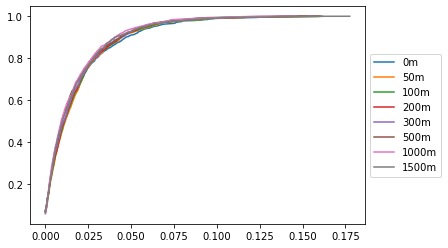

In [ ]:
#####Betweenness centrality
#3 cities
cities_3 = ["0m", "50m", "100m", "200m", "300m", "500m", "1000m","1500m"]
##### Loop through all cities
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {} #要把所有城市的DataFrame存成dictionary才能plot
dict2 = {}

for i in range(0, len(points_3)):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    G_DiGraph = nx.DiGraph(G)
    node_betweenness_centrality = nx.betweenness_centrality(G_DiGraph, weight='length',normalized=True)
    df_bc = pd.DataFrame(data=pd.Series(node_betweenness_centrality).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+center_point[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+center_point[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns

#     ar1.append(stats_df2)
    #####==============================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+cities_3[i]], label = cities_3[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

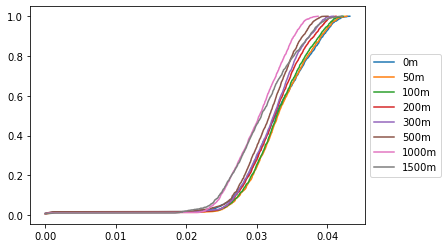

In [ ]:
#####Closeness centrality
cities_3 = ["0m", "50m", "100m", "200m", "300m", "500m", "1000m","1500m"]
##### Loop through all cities
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {} #要把所有城市的DataFrame存成dictionary才能plot
dict2 = {}

for i in range(0, len(points_3)):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    G_DiGraph = nx.DiGraph(G)
    node_closeness_centrality = nx.closeness_centrality(G_DiGraph)
    df_bc = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+cities_3[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+cities_3[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns

#     ar1.append(stats_df2)
    #####==============================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+cities_3[i]], label = cities_3[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

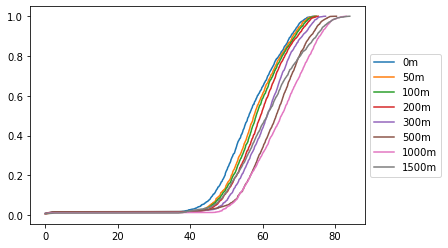

In [ ]:
#####Closeness centrality
cities_3 = ["0m", "50m", "100m", "200m", "300m", "500m", "1000m","1500m"]
##### Loop through all cities
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {} #要把所有城市的DataFrame存成dictionary才能plot
dict2 = {}

for i in range(0, len(points_3)):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    G_DiGraph = nx.DiGraph(G)
    node_closeness_centrality = nx.closeness_centrality(G_DiGraph)
    df_bc = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['bc'])
    df_bc['NCC'] = df_bc['bc']*len(node_closeness_centrality)

    stats_df = df_bc \
    .groupby('NCC') \
    ['NCC'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'NCC': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+cities_3[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+cities_3[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns

#     ar1.append(stats_df2)
    #####==============================
    ax.plot(dict1[i]['NCC'],dict1[i]['cdf'+'_'+cities_3[i]], label = cities_3[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df_bc

,bc,NCC
245970487,0.000000,0.000000
6632265218,0.000000,0.000000
2865960770,0.000000,0.000000
1227826578,0.000000,0.000000
248106556,0.000000,0.000000
...,...,...
224831207,0.042781,73.582591
224831189,0.042782,73.584497
5283557151,0.042782,73.584497
224830892,0.042822,73.653177


# Plot CC

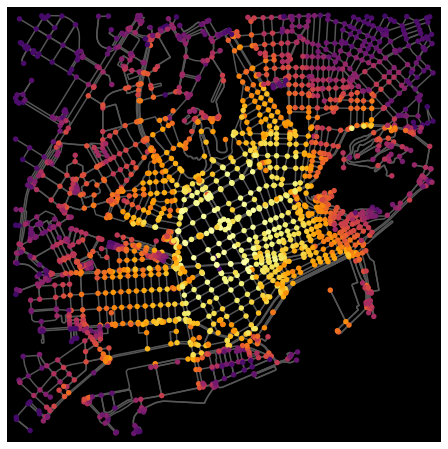

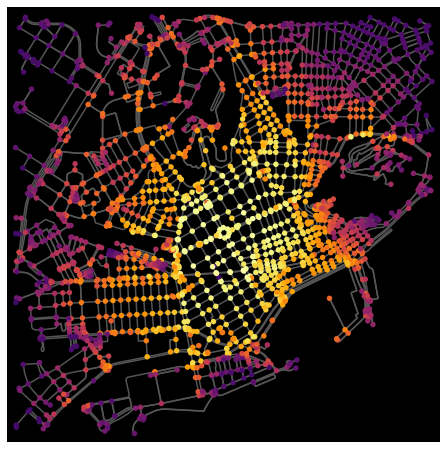

In [ ]:
distance = 1500
tags = '["highway"~"sidewalk|primary|secondary|tertiary|unclassified|residential|pedestrian|steps|path|service"]'

for i in range(0, 2):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    G_DiGraph = nx.DiGraph(G)
    node_closeness_centrality = nx.closeness_centrality(G_DiGraph)
    df = pd.DataFrame(data=pd.Series(node_closeness_centrality).sort_values(), columns=['cc'])
    df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
    df = df.reindex(G.nodes())
    nc = df['colors'].tolist()
    fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                            edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

# Plot NCC

In [ ]:
x =len(G.nodes())
node_centrality = nx.closeness_centrality(G)
df_cc = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df_cc['ncc'] = df_cc['cc'] * len(G.nodes())
df_cc

,cc,ncc
253782186,0.000000,0.000000
2865960770,0.000000,0.000000
6407516265,0.000000,0.000000
1227868766,0.000000,0.000000
248035851,0.000000,0.000000
...,...,...
5283557151,0.039661,83.604878
224831240,0.039783,83.862691
224831207,0.039784,83.864370
224831189,0.040206,84.753673


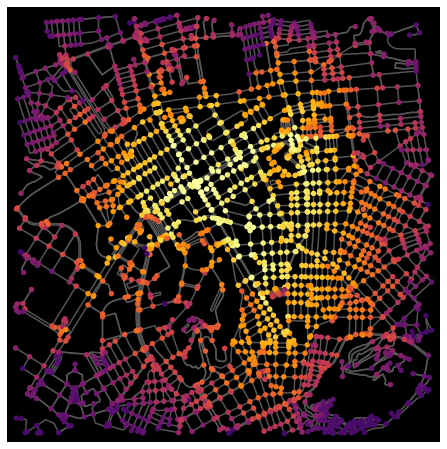

In [ ]:
#####Alicante: (38.3459813, -0.49069405)

distance = 1500
tags = '["highway"~"sidewalk|primary|secondary|tertiary|unclassified|residential|pedestrian|steps|path|service"]'

for i in range(7, 8):
    G = ox.graph_from_point(points_3[i], dist=distance, network_type='none', custom_filter = tags)
    ##### Calculate node closeness centrality
    node_centrality = nx.closeness_centrality(G)

    ##### Plot
    df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
    df['cc'] = df['cc'] * len(G.nodes())
    df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
    df = df.reindex(G.nodes())
    nc = df['colors'].tolist()
    fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                            edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)